<h2> Importamos un Archivo</h2>

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np

# Ruta del archivo shapefile
grid_filename = '/app/data/jams_streets__v2.geojson'
#shp_file='/app/Indicadores/stops/stops.geojson'
shp_filename='/app/data/output/land_uses_diversity'
#shp_file='/app/Indicadores/bus_path'

shp_file='/app/Indicadores/Area_Urbana_Consolidada/2006'

print(os.path.exists(grid_filename))
print(os.path.exists(shp_filename))
print(os.path.exists(shp_file))

True
True
True


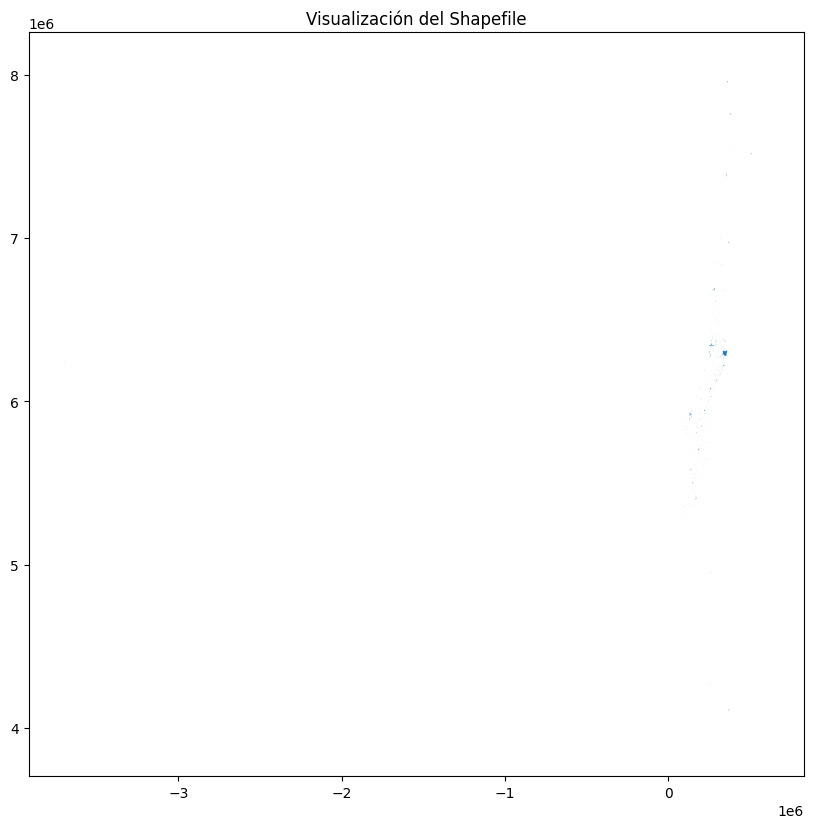

In [6]:
# Lectura del Parquet (si está correctamente estructurado con geometrías)
#gdf_p = gpd.read_parquet(parquet_file)

# Lectura del shapefil
gdf = gpd.read_file(shp_file)

# Visualización simple con Matplotlib
gdf.plot(figsize=(10, 10))
plt.title('Visualización del Shapefile')
plt.show()

In [7]:
print("Columnas disponibles:")
print(gdf.columns)

# Mostrar una vista previa de los primeros registros
print("\n\nVista previa de los datos:")
print(gdf.head())

# Opcional: ver información general de los datos
print("\n\nInformación del GeoDataFrame:")
print(gdf.info())

Columnas disponibles:
Index(['OBJECTID', 'REGIÓN', 'NOMBRE', 'SUPERFICIE', 'PESO_ADMIN', 'TIPO',
       'Shape_Leng', 'Shape_Area', 'ID_U_2017', 'ID_U_2011', 'ID_U_2006',
       'TCU_BRUTA_', 'POR_CU_200', 'TCU_2006_2', 'geometry'],
      dtype='object')


Vista previa de los datos:
   OBJECTID                                            REGIÓN  \
0         1                              Región de Valparaíso   
1         2  Región del Libertador General Bernardo O'Higgins   
2         3  Región del Libertador General Bernardo O'Higgins   
3         4                              Región de Valparaíso   
4         5                              Región de Valparaíso   

                                     NOMBRE    SUPERFICIE        PESO_ADMIN  \
0                           Gran Valparaíso  13534.236680  CAPITAL REGIONAL   
1  Rancagua - Machalí - Gultro - Los Lirios   3232.341263  CAPITAL REGIONAL   
2                                   Machalí    336.656422  CABECERA COMUNAL   
3        

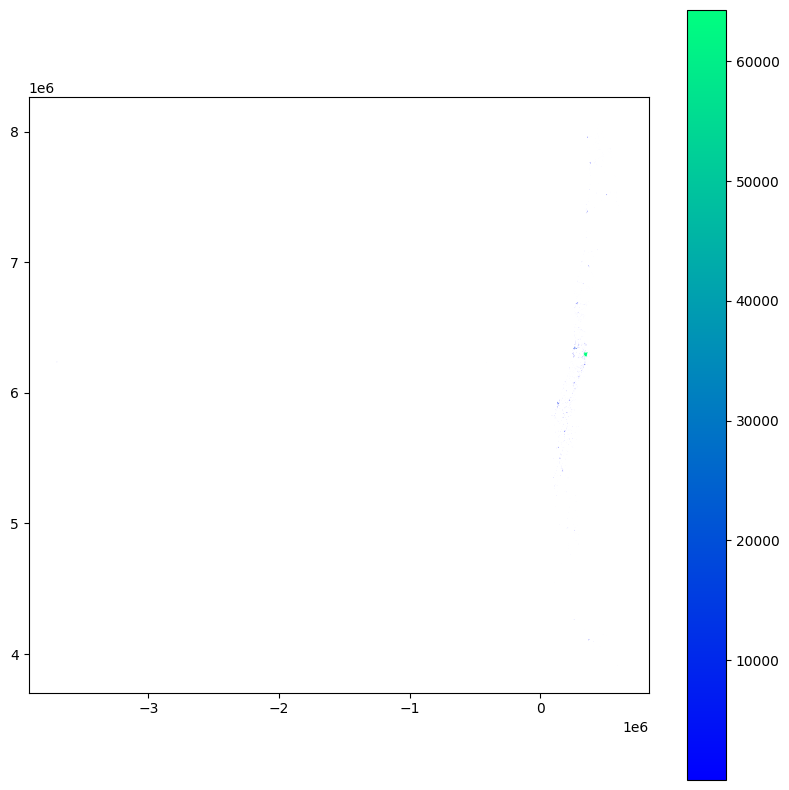

In [9]:
ax = gdf.plot(column='SUPERFICIE', cmap='winter', legend=True, figsize=(10, 10))
plt.show()

<h2> Indicador tipo Heatmap</h2>

In [1]:
from numpy import mean
import random
def indicator(geogrid, geogrid_data):  #Entra geogrid y geogrid_data (no se usa)
    layers = []   #Inicializamos las capas

    #HEATMAP
    features = []
    #Se recorre la lista de features de geogrid 
    for cell in geogrid['features']:
        feature = {}
        #Se extraen las coordenadas de cada celda.
        lat,lon = zip(*cell['geometry']['coordinates'][0])
        #Se calculan los promedios de las coordenadas, para representarlas en 1 punto.
        lat,lon = mean(lat),mean(lon)
        feature['coordinates'] = [lat,lon]
        #Se asigna un "peso" aleatorio entre 0 y 10 para la intensidad del heatmap
        feature['weight'] = 0 + gdf['properties']['diversity'] * 10
        #Agregamos los puntos procesados a features
        features.append(feature)
        
    #Creamos la capa heatmapN1 con un gradiente de color especificado
    layers.append({"id":"green heatmap","type":"heatmap","data":features,"properties":{"colorRange":[[237,248,251],[204,236,230],[153,216,201],[102,194,164],[44,162,95],[0,109,44]]}})


    # ARC
    # Seleccionamos 2 celdas aleatorias
    point_a = random.choice(geogrid['features'])
    point_b = random.choice(geogrid['features'])
    # Extraemos las coordenadas promedio de estas 2 celdas
    lat_a, lon_a = zip(*point_a['geometry']['coordinates'][0])
    lat_a, lon_a = mean(lat_a), mean(lon_a)
    lat_b, lon_b = zip(*point_b['geometry']['coordinates'][0])
    lat_b, lon_b = mean(lat_b), mean(lon_b)
    # Definimos un objeto arc_data
    arc_data = [{
        'inbound': 72633,
        'outbound': 74735,
        'from': {
            'name': 'Point A',
            'coordinates': [lat_a, lon_a]
        },
        'to': {
            'name': 'Point B',
            'coordinates': [lat_b, lon_b]
        }
    }]


    #Creamos la capa arcN1 con tipo "arco" y un ancho de 4
    layers.append({"id": "random arc", "type":"arc", "data":arc_data,"properties":{"width":4}})

    #Numeric indicators (son valores aleatorios)
    numeric = []

    #Barras
    numeric.append({"viz_type": "bar", "name": "example1", "value": random.random(), "description": "An example"})
    numeric.append({"viz_type": "bar", "name": "example2", "value": random.random(), "description": "An example 2"})
    numeric.append({"viz_type": "bar", "name": "example3", "value": random.random(), "description": "An example 3"})
    numeric.append({"viz_type": "bar", "name": "example4", "value": random.random(), "description": "An example 4"})

    #RADAR
    numeric.append({"viz_type": "radar", "name": "exampleRadar1", "value": random.random(), "description": "An example"})
    numeric.append({"viz_type": "radar", "name": "exampleRadar2", "value": random.random(), "description": "An example 2"})
    numeric.append({"viz_type": "radar", "name": "exampleRadar3", "value": random.random(), "description": "An example 3"})
    numeric.append({"viz_type": "radar", "name": "exampleRadar4", "value": random.random(), "description": "An example 4"})

    return layers, numeric
    

In [5]:
from numpy import mean
import geopandas as gpd
import os
import random  # Aseguramos que random esté importado
import json

# Ruta del archivo shapefile
grid_filename = '/app/data/output/land_uses_diversity/land_uses_diversity.shp'

# Verificar que el archivo existe
if not os.path.exists(grid_filename):
    raise FileNotFoundError(f"No se encontró el archivo: {grid_filename}")
    
# Leer el shapefile en un GeoDataFrame
gdf = gpd.read_file(grid_filename)

# Convertir el GeoDataFrame a diccionario con formato GeoJSON
geogrid = gdf.__geo_interface__

def indicator(geogrid, geogrid_data):
    layers = []         # Lista para almacenar las capas
    features = []       # Lista para almacenar los puntos de cada hexágono

    # Recorrer la lista de features del diccionario geogrid
    for cell in geogrid['features']:
        # Extraer las coordenadas del polígono (se asume un hexágono)
        coords = cell['geometry']['coordinates'][0]
        # Separar longitudes y latitudes
        lons = [pt[0] for pt in coords]
        lats = [pt[1] for pt in coords]
        # Calcular el centroide aproximado
        avg_lon = mean(lons)
        avg_lat = mean(lats)
        
        # Crear el diccionario feature para este hexágono
        feature = {}
        # El frontend espera las coordenadas en el orden [lat, lon]
        feature['coordinates'] = [avg_lat, avg_lon]
        # Calcular el peso: multiplicar diversity por 10
        feature['weight'] = cell['properties']['diversity'] * 10
        features.append(feature)
        
    # Construir el layer en el formato requerido
    layer = {
        "id": "land_uses",
        "type": "hexagon",
        "data": features,
        "properties": {
            "colorRange": [
                [237, 248, 251],
                [204, 236, 230],
                [153, 216, 201],
                [102, 194, 164],
                [44, 162, 95],
                [0, 109, 44]
            ]
        }
    }
    layers.append(layer)
    
    # Ejemplo de indicadores numéricos (valores aleatorios)
    numeric = []
    
    numeric.append({"viz_type": "bar", "name": "example1", "value": random.random(), "description": "An example"})
    numeric.append({"viz_type": "bar", "name": "example2", "value": random.random(), "description": "An example 2"})
    numeric.append({"viz_type": "bar", "name": "example3", "value": random.random(), "description": "An example 3"})
    numeric.append({"viz_type": "bar", "name": "example4", "value": random.random(), "description": "An example 4"})
    
    numeric.append({"viz_type": "radar", "name": "exampleRadar1", "value": random.random(), "description": "An example"})
    numeric.append({"viz_type": "radar", "name": "exampleRadar2", "value": random.random(), "description": "An example 2"})
    numeric.append({"viz_type": "radar", "name": "exampleRadar3", "value": random.random(), "description": "An example 3"})
    numeric.append({"viz_type": "radar", "name": "exampleRadar4", "value": random.random(), "description": "An example 4"})
    
    return layers, numeric

# Llamada a la función indicator utilizando el diccionario geogrid obtenido del shapefile
layers, numeric = indicator(geogrid, None)

# Mostrar la estructura resultante (por ejemplo, imprimir en consola en formato JSON)
print(json.dumps({"layers": layers, "numeric": numeric}, indent=4))

{
    "layers": [
        {
            "id": "land_uses",
            "type": "hexagon",
            "data": [
                {
                    "coordinates": [
                        5922852.19003245,
                        671721.8068038846
                    ],
                    "weight": 0.0
                },
                {
                    "coordinates": [
                        5922807.418575356,
                        671744.0670067078
                    ],
                    "weight": 0.0
                },
                {
                    "coordinates": [
                        5922762.647118264,
                        671766.3272095312
                    ],
                    "weight": 0.0
                },
                {
                    "coordinates": [
                        5922849.08220504,
                        671771.7101245035
                    ],
                    "weight": 0.0
                },
                {
        

In [6]:
from scripts.MicroBrix import MicroBrix

connection = MicroBrix(table_name='costanera_conce',
                       module_function=indicator,
                       keep_updating=True,
                       quietly=True)
connection.listen()

## Opened connection
'diversity'
## Opened connection
'diversity'
## Opened connection
'diversity'


In [43]:
connection.stop()

<h2> Modificación del Archivo </h2>

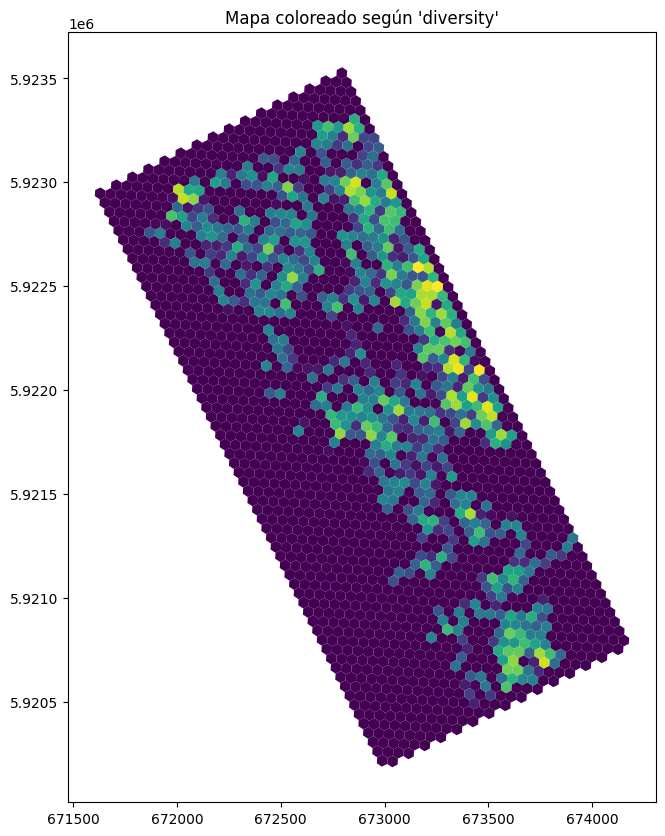

In [15]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 1. Agregar columna 'color' basada en la columna 'diversity'
# Normalizamos los valores de 'diversity' para mapearlos al rango [0,1]
norm = mcolors.Normalize(vmin=gdf['diversity'].min(), vmax=gdf['diversity'].max())
cmap = plt.colormaps['viridis']

# Para cada valor de 'diversity', asignamos un color en formato hexadecimal
gdf['color'] = gdf['diversity'].apply(lambda x: mcolors.to_hex(cmap(norm(x))))

# 2. Establecer la columna 'interactive' en False para todos los registros
gdf['interactive'] = False

# 3. Graficar el shapefile utilizando la columna 'color'
# Aquí, pasamos la serie de colores a través del parámetro "color"
ax = gdf.plot(color=gdf['color'], figsize=(10, 10))
ax.set_title("Mapa coloreado según 'diversity'")
plt.show()

In [16]:
#visualizar las primeras filas para verificar las nuevas columnas
print("Vista previa del GeoDataFrame:")
print(gdf.head())


Vista previa del GeoDataFrame:
   hex_id  diversity                                           geometry  \
0    69.0        0.0  POLYGON ((671699.651 5922841.174, 671701.445 5...   
1    70.0        0.0  POLYGON ((671721.911 5922796.403, 671723.705 5...   
2    71.0        0.0  POLYGON ((671744.171 5922751.631, 671745.965 5...   
3   136.0        0.0  POLYGON ((671749.554 5922838.066, 671751.348 5...   
4   137.0        0.0  POLYGON ((671771.814 5922793.295, 671773.609 5...   

     color  interactive  
0  #440154        False  
1  #440154        False  
2  #440154        False  
3  #440154        False  
4  #440154        False  


Archivo GeoJSON guardado en: land_uses_diversity.geojson
Columnas del GeoJSON:
Index(['hex_id', 'diversity', 'color', 'interactive', 'geometry'], dtype='object')
Vista previa de los datos:
   hex_id  diversity    color  interactive  \
0    69.0        0.0  #440154        False   
1    70.0        0.0  #440154        False   
2    71.0        0.0  #440154        False   
3   136.0        0.0  #440154        False   
4   137.0        0.0  #440154        False   

                                            geometry  
0  POLYGON ((671699.651 5922841.174, 671701.445 5...  
1  POLYGON ((671721.911 5922796.403, 671723.705 5...  
2  POLYGON ((671744.171 5922751.631, 671745.965 5...  
3  POLYGON ((671749.554 5922838.066, 671751.348 5...  
4  POLYGON ((671771.814 5922793.295, 671773.609 5...  


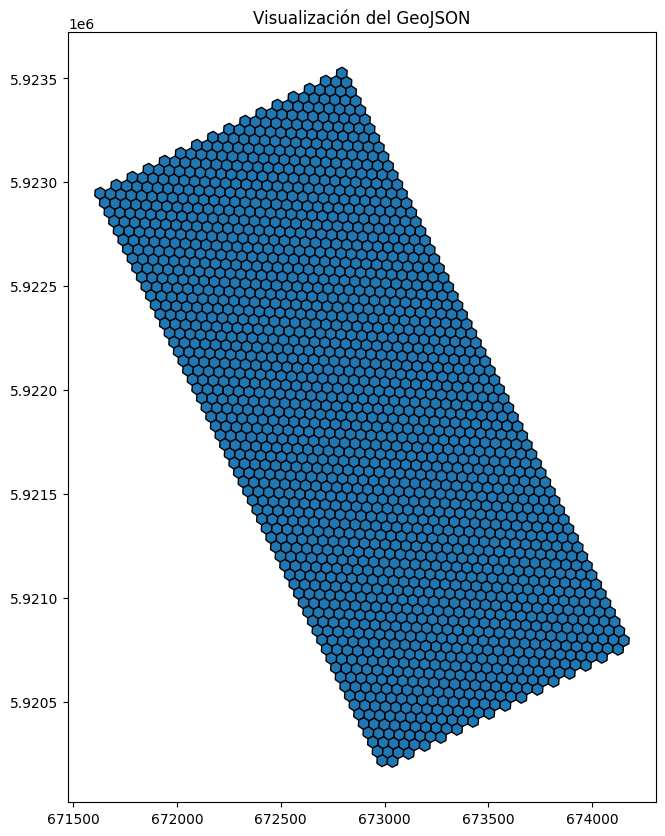

In [17]:
# Se especifica el driver "GeoJSON" para que el archivo se genere en formato JSON.
geojson_path = 'land_uses_diversity.geojson'
gdf.to_file(geojson_path, driver='GeoJSON')
print(f"Archivo GeoJSON guardado en: {geojson_path}")

#Leer el archivo GeoJSON
gdf_geojson = gpd.read_file(geojson_path)
print("Columnas del GeoJSON:")
print(gdf_geojson.columns)
print("Vista previa de los datos:")
print(gdf_geojson.head())

#Graficar el GeoJSON
# Aquí se utiliza el parámetro 'color' para definir un color de relleno y 'edgecolor' para definir el color del borde.
ax = gdf_geojson.plot(figsize=(10, 10), edgecolor='black')
ax.set_title("Visualización del GeoJSON")
plt.show()
